In [104]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msnbehdani/mock-dataset-of-second-hand-car-sales")


import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = os.path.join(path, os.listdir(path)[0])
df = pd.read_csv(csv_path)


sns.set_theme(style='ticks')

df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [105]:
prices_over_years = df.pivot_table(index='Year of manufacture',values='Price',aggfunc='mean')

In [106]:
prices_over_years

,Price
Year of manufacture,
1984,998.376712
1985,1102.658537
1986,1201.615561
1987,1302.869421
1988,1420.259563
1989,1707.623913
1990,1875.973850
1991,2057.704314
1992,2284.163650


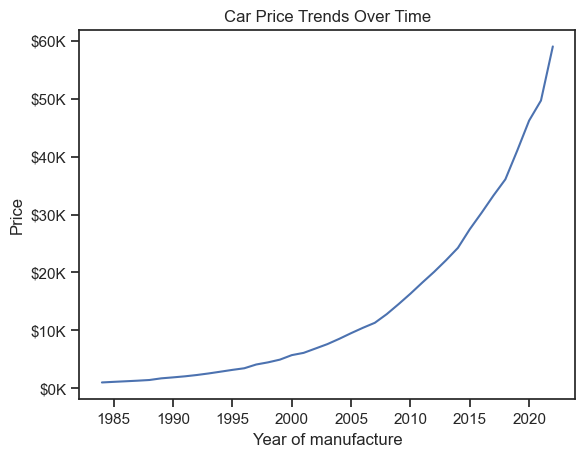

In [107]:
sns.lineplot(prices_over_years,x='Year of manufacture',y='Price')
plt.title('Car Price Trends Over Time')
plt.ticklabel_format(style='plain',axis='y')
ticks_x = plt.FuncFormatter(lambda y,pos : f'${int(y/1000)}K')
plt.gca().yaxis.set_major_formatter(ticks_x)
plt.show()


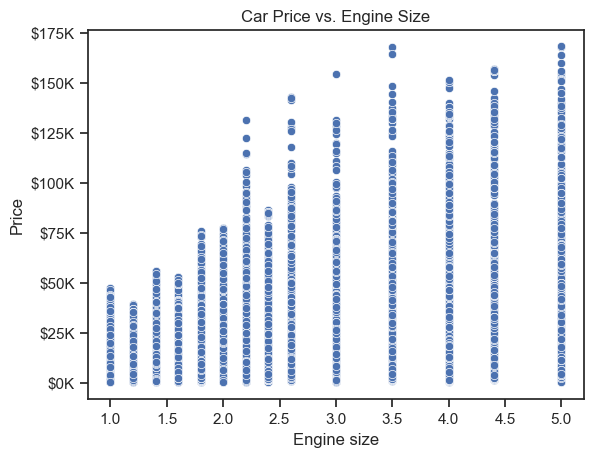

In [108]:
sns.scatterplot(df,x='Engine size',y='Price')
plt.title('Car Price vs. Engine Size')
ticks_x = plt.FuncFormatter(lambda y,pos : f'${int(y/1000)}K')
plt.gca().yaxis.set_major_formatter(ticks_x)
plt.show()


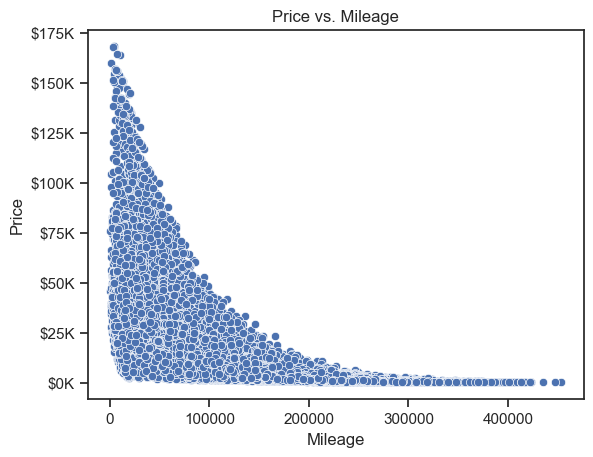

In [109]:
sns.scatterplot(df,x='Mileage',y='Price')
plt.title('Price vs. Mileage')
plt.gca().yaxis.set_major_formatter(ticks_x)
plt.show()

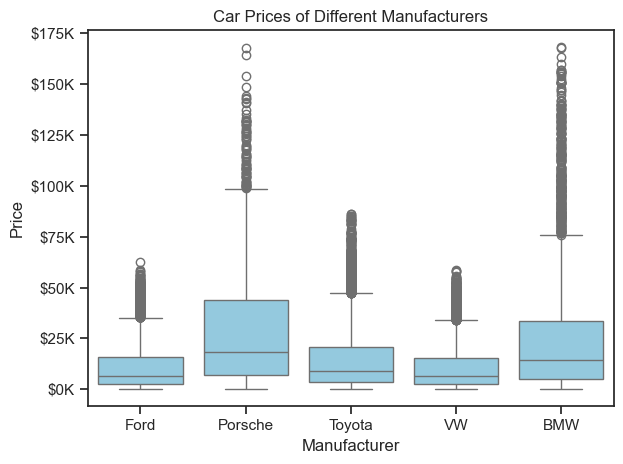

In [110]:
sns.boxplot(x='Manufacturer', y='Price', data=df, color='skyblue')
plt.title('Car Prices of Different Manufacturers')
plt.gca().yaxis.set_major_formatter(ticks_x)
plt.tight_layout()
plt.show()

In [113]:
import pandas as pd

# 1. Filter by acceptable year
min_year = 2010
df_filtered = df[df['Year of manufacture'] >= min_year].copy()

# 2. Compute Car Age, Ideal Mileage, and Mileage Deviation
current_year = df_filtered['Year of manufacture'].max()
df_filtered['Car Age'] = current_year - df_filtered['Year of manufacture']
df_filtered['Ideal Mileage'] = df_filtered['Car Age'] * 12000
df_filtered['Mileage Deviation'] = abs(df_filtered['Mileage'] - df_filtered['Ideal Mileage'])

# 3. Normalize Price and Mileage Deviation for scoring
df_filtered['Price_norm'] = df_filtered['Price'] / df_filtered['Price'].max()
df_filtered['Deviation_norm'] = df_filtered['Mileage Deviation'] / df_filtered['Mileage Deviation'].max()

# 4. Compute combined score (lower is better)
df_filtered['Score'] = df_filtered['Price_norm'] + df_filtered['Deviation_norm']

# 5. Select top 10 optimal cars
top_cars = df_filtered.nsmallest(10, 'Score')

# Show them
top_cars


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Car Age,Ideal Mileage,Mileage Deviation,Price_norm,Deviation_norm,Score
6583,Ford,Fiesta,1.2,Petrol,2010,142500,5088,12,144000,1500,0.030271,0.010909,0.041180
8893,VW,Golf,1.4,Petrol,2010,144461,6589,12,144000,461,0.039201,0.003353,0.042554
13272,Ford,Fiesta,1.4,Petrol,2010,145745,5354,12,144000,1745,0.031854,0.012691,0.044545
48710,Ford,Mondeo,1.6,Diesel,2010,143968,8760,12,144000,32,0.052118,0.000233,0.052350
41624,Toyota,Yaris,1.0,Petrol,2011,129222,6390,11,132000,2778,0.038017,0.020204,0.058221
39757,VW,Golf,1.6,Petrol,2011,130607,8410,11,132000,1393,0.050035,0.010131,0.060166
18405,Ford,Fiesta,1.0,Petrol,2012,116953,6486,10,120000,3047,0.038589,0.022160,0.060749
48363,Toyota,Yaris,1.4,Petrol,2013,107860,10174,9,108000,140,0.060530,0.001018,0.061549
30769,Toyota,Yaris,1.2,Hybrid,2012,121344,9546,10,120000,1344,0.056794,0.009775,0.066569
29224,Ford,Focus,1.0,Petrol,2012,118335,9307,10,120000,1665,0.055372,0.012109,0.067481


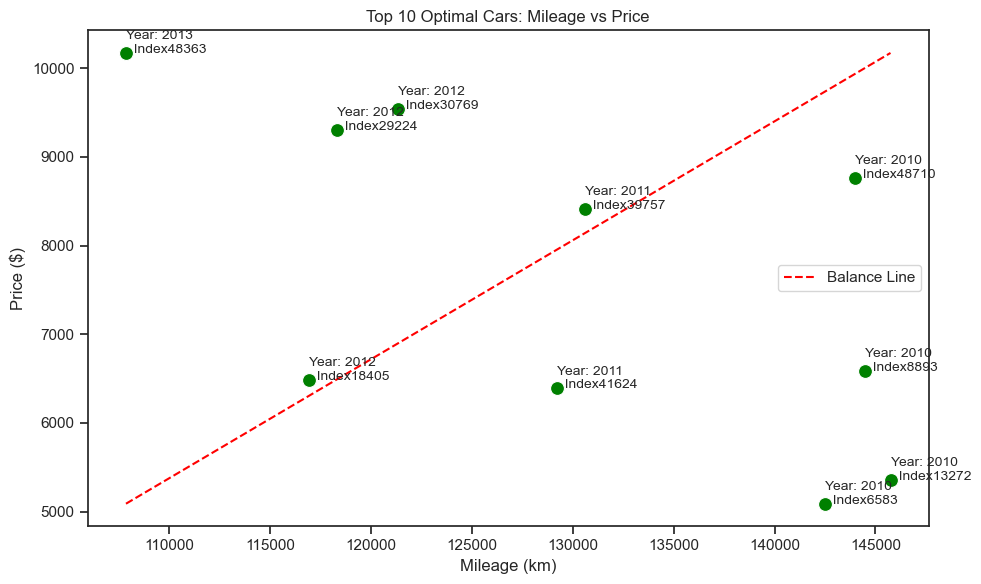

In [151]:
plt.figure(figsize=(10,6))

# Scatter plot of top 10 cars
sns.scatterplot(data=top_cars, x='Mileage', y='Price',s=100,color='green')
# Draw a diagonal reference line from min to max (pseudo "balance line")
min_mileage, max_mileage = top_cars['Mileage'].min(), top_cars['Mileage'].max()
min_price, max_price = top_cars['Price'].min(), top_cars['Price'].max()
plt.plot([min_mileage, max_mileage], [min_price, max_price], color='red', linestyle='--', label='Balance Line')
texts = []
for idx, row in top_cars.iterrows():
    label = f"Year: {row['Year of manufacture']} \n  Index{str(idx)}"
    texts.append(plt.text(row['Mileage'], row['Price'], label, fontsize=10))


plt.xlabel("Mileage (km)")
plt.ylabel("Price ($)")
plt.title("Top 10 Optimal Cars: Mileage vs Price")
plt.legend()
plt.tight_layout()
plt.show()


In [161]:
print('The Most 2 Optimal Cars are : ')
top_cars.loc[[18405,39757]]

The Most 2 Optimal Cars are : 


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price,Car Age,Ideal Mileage,Mileage Deviation,Price_norm,Deviation_norm,Score
18405,Ford,Fiesta,1.0,Petrol,2012,116953,6486,10,120000,3047,0.038589,0.022160,0.060749
39757,VW,Golf,1.6,Petrol,2011,130607,8410,11,132000,1393,0.050035,0.010131,0.060166
